In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

**Step 0: Dataset Inspection**

Load the dataset and make a quick inspection.

C:\Users\mykhailo.zaika\AppData\Local\Temp\ipykernel_22408\3898317889.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


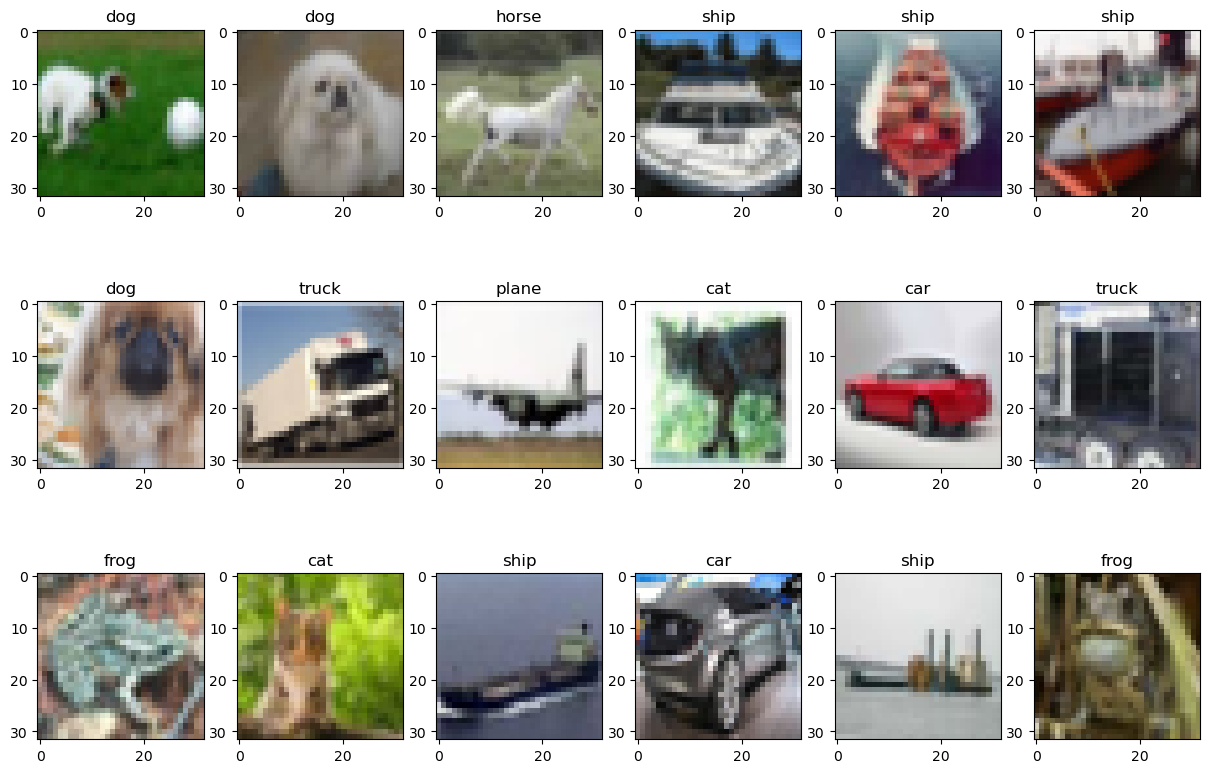

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Counter({np.uint8(6): 5000, np.uint8(9): 5000, np.uint8(4): 5000, np.uint8(1): 5000, np.uint8(2): 5000, np.uint8(7): 5000, np.uint8(8): 5000, np.uint8(3): 5000, np.uint8(5): 5000, np.uint8(0): 5000})


([<matplotlib.axis.XTick at 0x2e2e5b70110>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

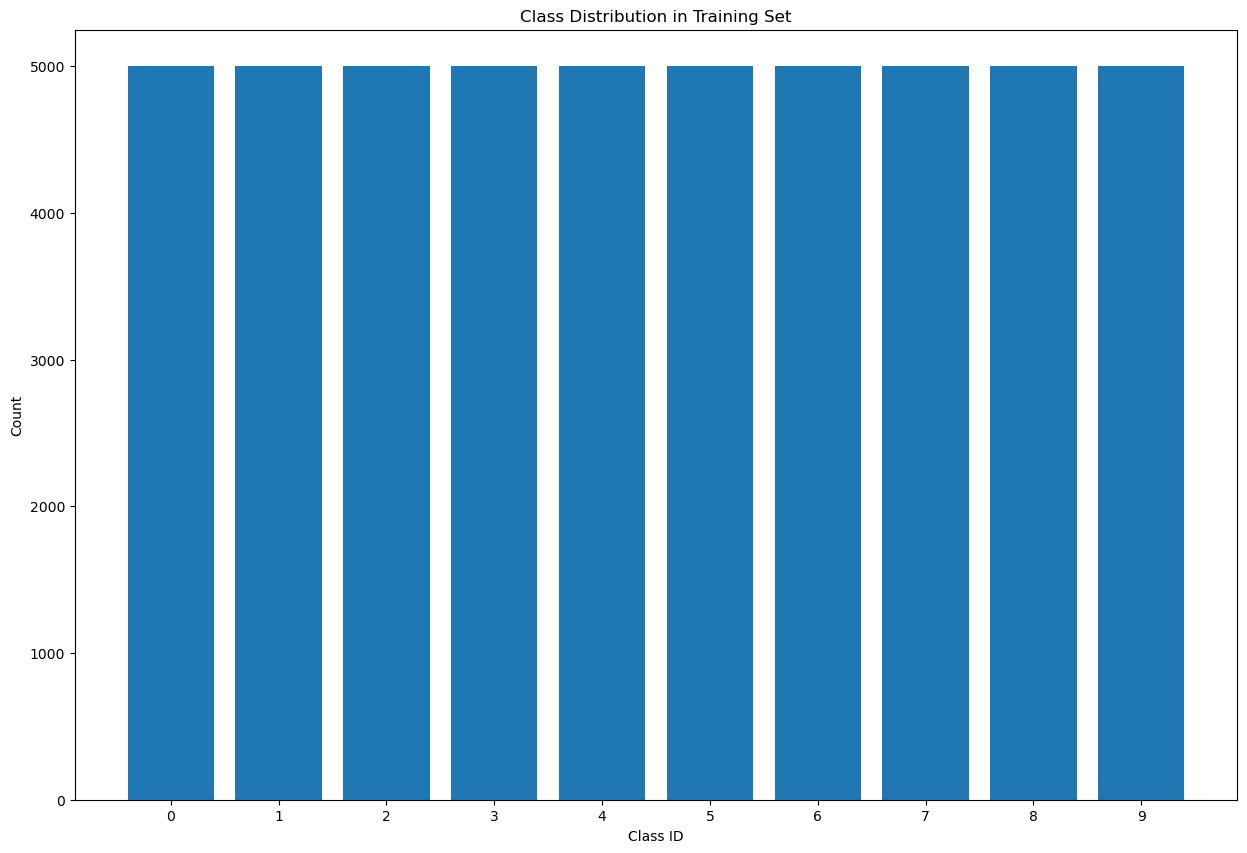

In [3]:
# Compute the class histogram
from collections import Counter
histogram = Counter(y_train.ravel())
print(histogram)

#Візуалізація
plt.bar(histogram.keys(), histogram.values())
plt.title('Class Distribution in Training Set')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(list(classes.keys())) # Встановлюємо мітки 0-9 на осі x

**Step 1: Data Preparation**

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [4]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


**Step 2: Building the Classifier**

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [5]:
# Build the classifier
# Define the input shape
# 'size' was 32, and CIFAR-10 images have 3 color channels (RGB)
inputs = Input(shape=(size, size, 3))

# 1st Convolutional Block
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 2nd Convolutional Block
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the feature maps to a vector
x = Flatten()(x)

# Fully Connected (Dense) layer
x = Dense(units=128, activation='relu')(x)

# Output layer
# 'num_classes' is 10
# 'softmax' is used for multi-class classification
outputs = Dense(units=num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

**Step 3: Training**

Compile the model and train it.

In [6]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4623 - loss: 1.5014 - val_accuracy: 0.5440 - val_loss: 1.2729
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5998 - loss: 1.1386 - val_accuracy: 0.6185 - val_loss: 1.0949
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6538 - loss: 0.9941 - val_accuracy: 0.6541 - val_loss: 0.9952
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6876 - loss: 0.8991 - val_accuracy: 0.6717 - val_loss: 0.9486
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7143 - loss: 0.8245 - val_accuracy: 0.6741 - val_loss: 0.9431
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7361 - loss: 0.7633 - val_accuracy: 0.6668 - val_loss: 0.9739
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7542 - loss: 0.7099 - val_accuracy: 0.6604 - val_loss: 1.0031
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7709 - loss: 0.6633 - val_accu

Train Acc      0.9299399852752686
Validation Acc 0.6728000044822693


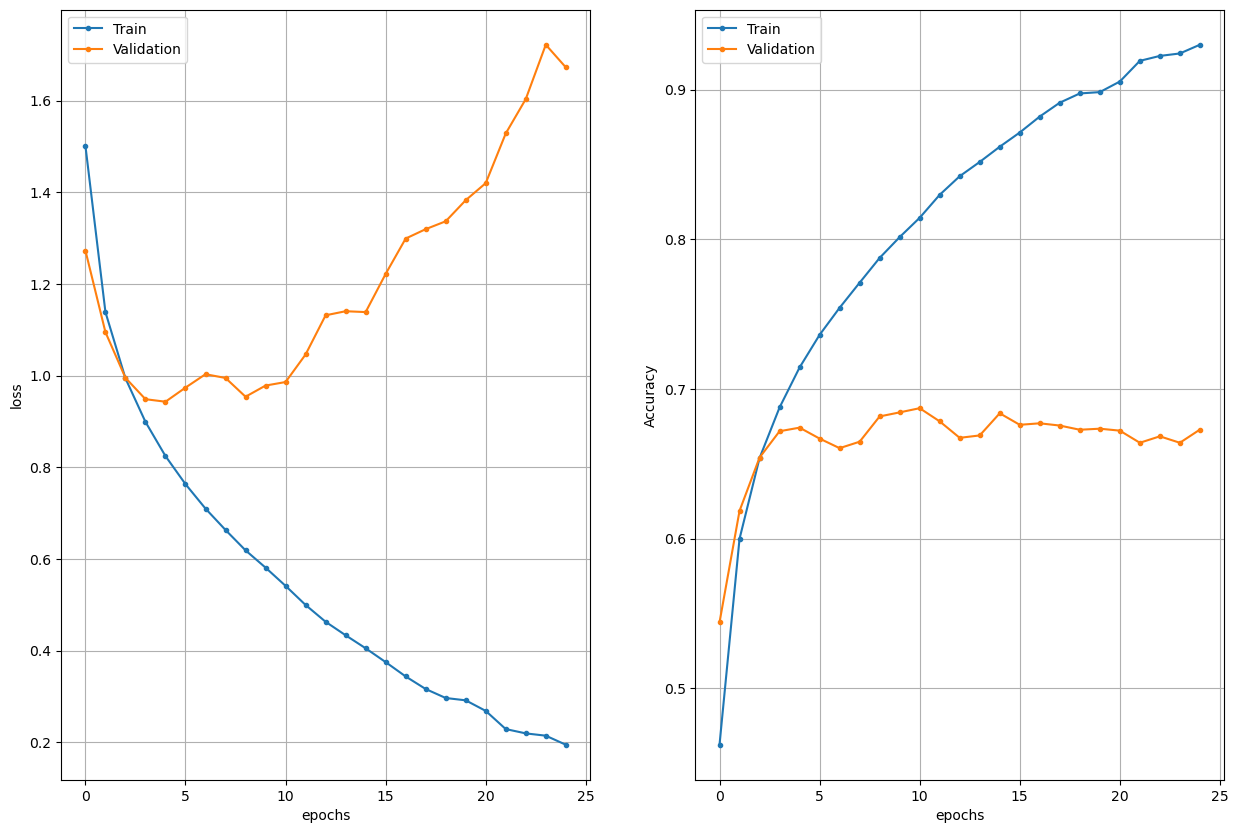

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

**Step 4: Evaluation**

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [8]:
# Compute the labels and the predictions as sparse values
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    
    acc = np.mean(y_pred[y_true == class_id] == class_id)
    print(class_name, acc)

plane 0.739
car 0.768
bird 0.514
cat 0.44
deer 0.649
dog 0.673
frog 0.634
horse 0.769
ship 0.867
truck 0.675


In [11]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6728 - loss: 1.6726
Test loss   1.672621488571167
Test metric 0.6728000044822693


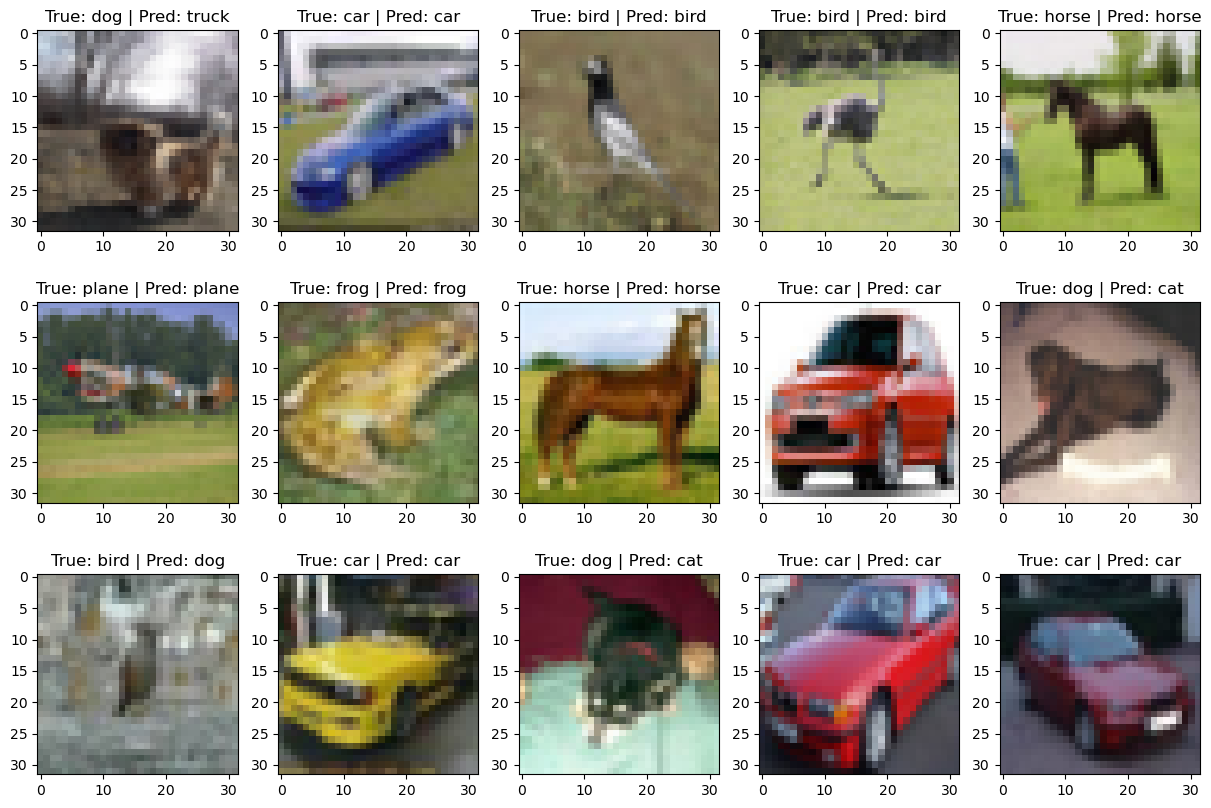

In [10]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

**Questions**


- What is the overall accuracy of the classifier?

загальна точність становить 

    Test metric 0.6728000044822693

- What modifications would you do in order to improve the classification accuracy?

1. Збільшити кількість епох (хоча, тут мало допоможе - ми вже вийшли на "сатурацію" по accuracy)
2. Додати більше шарів, наприклад Conv2D (шукає певні ознаки) та MaxPooling2D(фокусується на головному)
3. Додати Batch Normalization для більшої адаптивності
4. Додати більше (!)різних(!) даних для начання

Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?

In [ ]:
# --- "Step 2.2" ---

from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras import Model

# Визначаємо вхід
inputs = Input(shape=(size, size, 3))

# Блок 1
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Блок 2
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Блок 3 (Робимо мережу глибшою)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)                                  
x = Activation('relu')(x)                                    
x = MaxPooling2D(pool_size=(2, 2))(x)                        

# Перехід до повнозв'язного шару
x = Flatten()(x)

# Повнозв'язний шар
x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Вихідний шар
outputs = Dense(units=num_classes, activation='softmax')(x)

# Створюємо модель
model = Model(inputs=inputs, outputs=outputs)

# Дивимось на нову, більшу модель
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [17]:
# --- "Step 3.2" ---

epochs = 40
batch_size = 128

# Компіляція (та сама)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання нової моделі
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6004 - loss: 1.1275 - val_accuracy: 0.3495 - val_loss: 1.9575
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7389 - loss: 0.7550 - val_accuracy: 0.4612 - val_loss: 1.8635
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7960 - loss: 0.5965 - val_accuracy: 0.5350 - val_loss: 1.4958
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8385 - loss: 0.4789 - val_accuracy: 0.5534 - val_loss: 1.5315
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8753 - loss: 0.3773 - val_accuracy: 0.6383 - val_loss: 1.2674
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9061 - loss: 0.2912 - val_accuracy: 0.6042 - val_loss: 1.5823
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9287 - loss: 0.2282 - val_accuracy: 0.6656 - val_loss: 1.2952
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9477 - loss: 0.1738 - 

Train Acc      0.9996399879455566
Validation Acc 0.7721999883651733


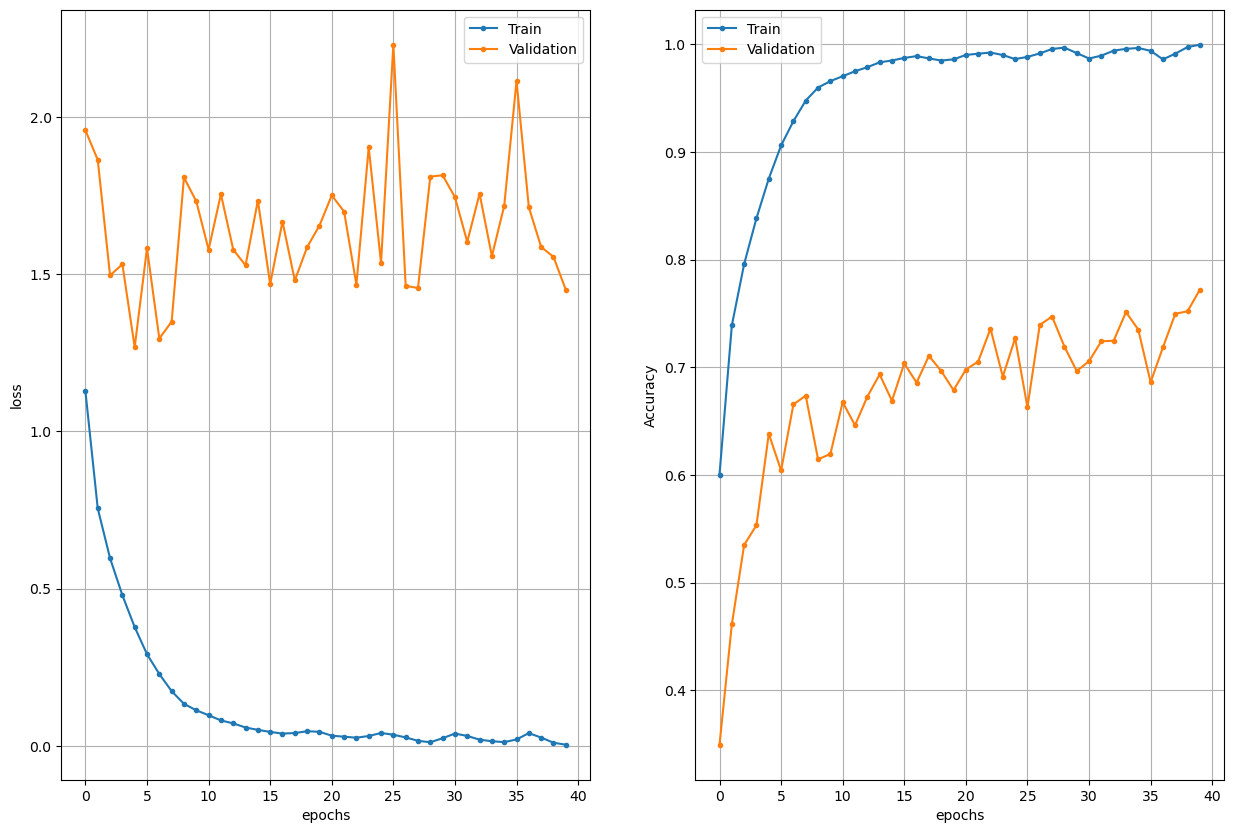

In [18]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

Результат: Accuracy 0.7721999883651733, але по loss - явний overfitting